# Usage: policy measures
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.13.3-iota.new.56.280.420.422.429.449.fix.438.441.450'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

196

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **17th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{2: ['Laos', 'Holy See', 'Solomon Islands', 'Timor-Leste'],
 3: ['Saint Kitts and Nevis'],
 4: ['Brunei', 'Tanzania', 'Fiji'],
 5: ['Dominica', 'Grenada', 'Equatorial Guinea'],
 6: ['Cambodia', 'Saint Lucia', 'Mauritius'],
 7: ['Saint Vincent and the Grenadines', 'Antigua and Barbuda', 'Seychelles'],
 8: ['Gambia', 'Trinidad and Tobago', 'Kyrgyzstan', 'Barbados',
     'Northern Mariana Islands', 'Bahamas', 'Liechtenstein', 'Madagascar'],
 9: ['Uzbekistan', 'Philippines', 'Ghana', 'Jamaica', 'Malawi', 'Vietnam',
     'Oman', 'Sao Tome and Principe', 'Australia'],
 10: ['Kenya', 'Bermuda', 'Senegal', 'Iraq', 'Libya', 'Kazakhstan', 'Burundi',
      'Eritrea', 'Lesotho', 'Ethiopia', 'Cape Verde', 'Mozambique', 'Monaco',
      'Mongolia', 'Bahrain', 'Rwanda', 'South Africa', 'India', 'Andorra',
      'Honduras', 'Virgin Islands, U.S.', 'Papua New Guinea', 'Kuwait', 'Chile',
      'El Salvador', 'Guam', 'Bhutan', 'Guyana', 'Singapore', 'Iceland',
      'Suriname', 'Venezuela', 'Angola', 'Rep

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=17)
# The number of countries
len(analyser.countries)

7

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{17: ['United Kingdom', 'Norway', 'Germany', 'Italy', 'Netherlands', 'Portugal',
      'Finland']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country        Phase                                        
United Kingdom 0th    Past  23Feb2020  09Apr2020    66460344
               1st    Past  10Apr2020  30Apr2020    66460344
               2nd    Past  01May2020  27May2020    66460344
               3rd    Past  28May2020  07Aug2020    66460344
               4th    Past  08Aug2020  16Sep2020    66460344
...                    ...        ...        ...         ...
Finland        12th   Past  26Nov2020  01Dec2020     5515525
               13th   Past  02Dec2020  08Dec2020     5515525
               14th   Past  09Dec2020  14Dec2020     5515525
               15th   Past  15Dec2020  21Dec2020     5515525
               16th   Past  22Dec2020  30Dec2020     5515525

[119 rows x 4 columns]

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	NOR,  8th phase (21Oct2020 - 28Oct2020): finished  190 trials in 0 min 10 sec

	NLD, 12th phase (19Nov2020 - 25Nov2020): finished  197 trials in 0 min 10 sec

	NOR, 12th phase (23Nov2020 - 29Nov2020): finished  196 trials in 0 min 10 sec

	GBR,  7th phase (13Oct2020 - 20Oct2020): finished  200 trials in 0 min 10 sec

	DEU,  3rd phase (22Apr2020 - 17Jun2020): finished  225 trials in 0 min 10 sec

	PRT,  6th phase (25Sep2020 - 12Oct2020): finished  238 trials in 0 min 10 sec

	GBR, 15th phase (09Dec2020 - 14Dec2020): finished  252 trials in 0 min 10 sec

	PRT,  7th phase (13Oct2020 - 21Oct2020): finished  248 trials in 0 min 10 sec

	ITA,  7th phase (15Oct2020 - 21Oct2020): finished  230 trials in 0 min 10 sec

	PRT,  8th phase (22Oct2020 - 28Oct2020): finished  229 trials in 0 min 10 sec

	NLD,  1st phase (08Apr2020 - 01May2020): finished  220 trials in 0 min 10 sec

	NLD,  7th phase (14Oct2020 - 19Oct2020): finished  222 trials in 0 min 10 sec

	NLD,  0th phase (16Mar2020 - 07Apr2020): finished  286 trials in 0 min 10 sec

	DEU,  1st phase (24Mar2020 - 04Apr2020): finished  291 trials in 0 min 10 sec

	GBR, 14th phase (02Dec2020 - 08Dec2020): finished  295 trials in 0 min 10 sec

	NLD,  2nd phase (02May2020 - 09Aug2020): finished  266 trials in 0 min 10 sec

	NLD,  9th phase (30Oct2020 - 04Nov2020): finished  309 trials in 0 min 10 sec

	ITA,  2nd phase (01Apr2020 - 16Apr2020): finished  305 trials in 0 min 10 sec

	NLD, 11th phase (12Nov2020 - 18Nov2020): finished  309 trials in 0 min 10 sec

	DEU,  6th phase (17Sep2020 - 08Oct2020): finished  303 trials in 0 min 10 sec

	FIN,  1st phase (05Apr2020 - 19Apr2020): finished  305 trials in 0 min 10 sec

	PRT, 10th phase (05Nov2020 - 14Nov2020): finished  307 trials in 0 min 10 sec

	PRT,  5th phase (03Sep2020 - 24Sep2020): finished  303 trials in 0 min 10 sec

	ITA, 12th phase (27Nov2020 - 02Dec2020): finished  309 trials in 0 min 10 sec

	ITA, 15th phase (16Dec2020 - 22Dec2020): finished  307 trials in 0 min 10 sec

	NOR,  5th phase (03Sep2020 - 19Sep2020): finished  304 trials in 0 min 10 sec

	FIN,  8th phase (19Oct2020 - 28Oct2020): finished  305 trials in 0 min 10 sec

	NLD, 15th phase (10Dec2020 - 19Dec2020): finished  304 trials in 0 min 10 sec

	PRT,  4th phase (15Jul2020 - 02Sep2020): finished  294 trials in 0 min 10 sec

	GBR,  5th phase (17Sep2020 - 02Oct2020): finished  307 trials in 0 min 10 sec

	GBR,  4th phase (08Aug2020 - 16Sep2020): finished  291 trials in 0 min 10 sec

	GBR,  9th phase (28Oct2020 - 03Nov2020): finished  312 trials in 0 min 10 sec

	FIN,  5th phase (21Aug2020 - 22Sep2020): finished  289 trials in 0 min 10 sec

	DEU,  7th phase (09Oct2020 - 20Oct2020): finished  311 trials in 0 min 10 sec

	GBR, 10th phase (04Nov2020 - 10Nov2020): finished  304 trials in 0 min 10 sec

	GBR, 11th phase (11Nov2020 - 16Nov2020): finished  309 trials in 0 min 10 sec

	GBR, 13th phase (24Nov2020 - 01Dec2020): finished  307 trials in 0 min 10 sec

	NLD,  4th phase (13Sep2020 - 26Sep2020): finished  305 trials in 0 min 10 sec

	NOR,  0th phase (15Mar2020 - 25Mar2020): finished  304 trials in 0 min 10 sec

	FIN,  4th phase (28May2020 - 20Aug2020): finished  282 trials in 0 min 10 sec

	NOR, 14th phase (08Dec2020 - 14Dec2020): finished  283 trials in 0 min 10 sec

	NOR,  7th phase (06Oct2020 - 20Oct2020): finished  281 trials in 0 min 10 sec

	NLD, 13th phase (26Nov2020 - 03Dec2020): finished  283 trials in 0 min 10 sec

	DEU,  5th phase (16Aug2020 - 16Sep2020): finished  275 trials in 0 min 10 sec

	NOR, 11th phase (10Nov2020 - 22Nov2020): finished  291 trials in 0 min 10 sec

	GBR, 16th phase (15Dec2020 - 30Dec2020): finished  292 trials in 0 min 10 sec

	DEU,  4th phase (18Jun2020 - 15Aug2020): finished  269 trials in 0 min 10 sec

	GBR, 12th phase (17Nov2020 - 23Nov2020): finished  282 trials in 0 min 10 sec

	NLD,  5th phase (27Sep2020 - 06Oct2020): finished  282 trials in 0 min 10 sec

	ITA, 14th phase (10Dec2020 - 15Dec2020): finished  285 trials in 0 min 10 sec

	ITA,  6th phase (01Oct2020 - 14Oct2020): finished  290 trials in 0 min 10 sec

	PRT,  2nd phase (06May2020 - 13Jun2020): finished  287 trials in 0 min 10 sec

	NLD, 16th phase (20Dec2020 - 30Dec2020): finished  285 trials in 0 min 10 sec

	FIN,  0th phase (17Mar2020 - 04Apr2020): finished  278 trials in 0 min 10 sec

	ITA,  8th phase (22Oct2020 - 27Oct2020): finished  287 trials in 0 min 10 sec

	PRT,  1st phase (08Apr2020 - 05May2020): finished  273 trials in 0 min 10 sec

	ITA, 10th phase (07Nov2020 - 16Nov2020): finished  299 trials in 0 min 10 sec

	ITA,  0th phase (24Feb2020 - 19Mar2020): finished  296 trials in 0 min 10 sec

	DEU,  0th phase (19Jan2020 - 23Mar2020): finished  288 trials in 0 min 10 sec

	DEU,  2nd phase (05Apr2020 - 21Apr2020): finished  300 trials in 0 min 10 sec

	PRT, 11th phase (15Nov2020 - 25Nov2020): finished  282 trials in 0 min 10 sec

	FIN,  2nd phase (20Apr2020 - 04May2020): finished  279 trials in 0 min 10 sec

	GBR,  8th phase (21Oct2020 - 27Oct2020): finished  282 trials in 0 min 10 sec

	GBR,  3rd phase (28May2020 - 07Aug2020): finished  260 trials in 0 min 10 sec

	GBR,  1st phase (10Apr2020 - 30Apr2020): finished  289 trials in 0 min 10 sec

	DEU, 12th phase (18Nov2020 - 24Nov2020): finished  295 trials in 0 min 10 sec

	DEU, 13th phase (25Nov2020 - 30Nov2020): finished  295 trials in 0 min 10 sec

	FIN, 10th phase (09Nov2020 - 18Nov2020): finished  292 trials in 0 min 10 sec

	NOR, 16th phase (22Dec2020 - 30Dec2020): finished  278 trials in 0 min 10 sec

	FIN,  7th phase (08Oct2020 - 18Oct2020): finished  277 trials in 0 min 10 sec

	ITA,  5th phase (29Aug2020 - 30Sep2020): finished  269 trials in 0 min 10 sec

	ITA, 16th phase (23Dec2020 - 30Dec2020): finished  275 trials in 0 min 10 sec

	FIN, 12th phase (26Nov2020 - 01Dec2020): finished  291 trials in 0 min 10 sec

	FIN,  9th phase (29Oct2020 - 08Nov2020): finished  288 trials in 0 min 10 sec

	NOR,  4th phase (06Aug2020 - 02Sep2020): finished  284 trials in 0 min 10 sec

	DEU, 15th phase (11Dec2020 - 21Dec2020): finished  287 trials in 0 min 10 sec

	NOR,  2nd phase (06Apr2020 - 02May2020): finished  283 trials in 0 min 10 sec

	GBR,  6th phase (03Oct2020 - 12Oct2020): finished  291 trials in 0 min 10 sec

	NLD, 10th phase (05Nov2020 - 11Nov2020): finished  293 trials in 0 min 10 sec

	NOR, 15th phase (15Dec2020 - 21Dec2020): finished  292 trials in 0 min 10 sec

	FIN,  6th phase (23Sep2020 - 07Oct2020): finished  289 trials in 0 min 10 sec

	FIN,  3rd phase (05May2020 - 27May2020): finished  282 trials in 0 min 10 sec

	DEU, 11th phase (11Nov2020 - 17Nov2020): finished  286 trials in 0 min 10 sec

	NLD,  8th phase (20Oct2020 - 29Oct2020): finished  285 trials in 0 min 10 sec

	NOR,  1st phase (26Mar2020 - 05Apr2020): finished  288 trials in 0 min 10 sec

	NLD, 14th phase (04Dec2020 - 09Dec2020): finished  292 trials in 0 min 10 sec

	NOR,  3rd phase (03May2020 - 05Aug2020): finished  264 trials in 0 min 10 sec

	ITA,  4th phase (12May2020 - 28Aug2020): finished  259 trials in 0 min 10 sec

	NOR,  6th phase (20Sep2020 - 05Oct2020): finished  305 trials in 0 min 10 sec

	NLD,  6th phase (07Oct2020 - 13Oct2020): finished  309 trials in 0 min 10 sec

	GBR,  0th phase (23Feb2020 - 09Apr2020): finished  293 trials in 0 min 10 sec

	ITA,  1st phase (20Mar2020 - 31Mar2020): finished  277 trials in 0 min 10 sec

	NLD,  3rd phase (10Aug2020 - 12Sep2020): finished  270 trials in 0 min 10 sec

	ITA, 13th phase (03Dec2020 - 09Dec2020): finished  279 trials in 0 min 10 sec

	PRT,  3rd phase (14Jun2020 - 14Jul2020): finished  293 trials in 0 min 10 sec

	NOR,  9th phase (29Oct2020 - 03Nov2020): finished  302 trials in 0 min 10 sec

	ITA,  3rd phase (17Apr2020 - 11May2020): finished  294 trials in 0 min 10 sec

	NOR, 10th phase (04Nov2020 - 09Nov2020): finished  307 trials in 0 min 10 sec

	ITA,  9th phase (28Oct2020 - 06Nov2020): finished  304 trials in 0 min 10 sec

	NOR, 13th phase (30Nov2020 - 07Dec2020): finished  304 trials in 0 min 10 sec

	DEU, 14th phase (01Dec2020 - 10Dec2020): finished  304 trials in 0 min 10 sec

	PRT, 12th phase (26Nov2020 - 02Dec2020): finished  305 trials in 0 min 10 sec

	PRT,  9th phase (29Oct2020 - 04Nov2020): finished  304 trials in 0 min 10 sec

	PRT,  0th phase (14Mar2020 - 07Apr2020): finished  276 trials in 0 min 10 sec

	GBR,  2nd phase (01May2020 - 27May2020): finished  270 trials in 0 min 10 sec

	ITA, 11th phase (17Nov2020 - 26Nov2020): finished  277 trials in 0 min 10 sec

Completed optimization. Total: 5 min  1 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE     Rt  \
Country        Phase                                                         
United Kingdom 0th    Past  23Feb2020  09Apr2020    66460344  SIR-F  32.06   
               1st    Past  10Apr2020  30Apr2020    66460344  SIR-F   1.31   
               2nd    Past  01May2020  27May2020    66460344  SIR-F   0.82   
               3rd    Past  28May2020  07Aug2020    66460344  SIR-F    0.7   
               4th    Past  08Aug2020  16Sep2020    66460344  SIR-F   1.46   
...                    ...        ...        ...         ...    ...    ...   
Finland        12th   Past  26Nov2020  01Dec2020     5515525  SIR-F   1.76   
               13th   Past  02Dec2020  08Dec2020     5515525      -      -   
               14th   Past  09Dec2020  14Dec2020     5515525      -      -   
               15th   Past  15Dec2020  21Dec2020     5515525      -      -   
               16th   Past  22Dec2020  30Dec2020     5515525      -      -   

                           theta        kappa        rho        sigma  tau  \
Country        Phase                                                         
United Kingdom 0th     0.0389303  0.000856904  0.0582984  0.000890809  360   
               1st      0.201615  1.88106e-06  0.0195906    0.0119544  360   
               2nd     0.0383651   0.00113808  0.0147168    0.0160411  360   
               3rd     0.0673926  0.000238462   0.014161    0.0185909  360   
               4th     0.0182079  0.000450842  0.0198976    0.0129323  360   
...                          ...          ...        ...          ...  ...   
Finland        12th   0.00113172  7.92986e-05  0.0174424   0.00984249  360   
               13th            -            -          -            -    -   
               14th            -            -          -            -    -   
               15th            -            -          -            -    -   
               16th            -            -          -            -    -   

                     1/alpha2 [day] 1/beta [day] 1/gamma [day] alpha1 [-]  \
Country        Phase                                                        
United Kingdom 0th              291            4           280      0.039   
               1st           132903           12            20      0.202   
               2nd              219           16            15      0.038   
               3rd             1048           17            13      0.067   
               4th              554           12            19      0.018   
...                             ...          ...           ...        ...   
Finland        12th            3152           14            25      0.001   
               13th               -            -             -          -   
               14th               -            -             -          -   
               15th               -            -             -          -   
               16th               -            -             -          -   

                          RMSLE Trials       Runtime  
Country        Phase                                  
United Kingdom 0th      0.72449    293  0 min 10 sec  
               1st    0.0760028    289  0 min 10 sec  
               2nd    0.0549466    270  0 min 10 sec  
               3rd     0.122353    260  0 min 10 sec  
               4th    0.0695468    291  0 min 10 sec  
...                         ...    ...           ...  
Finland        12th   0.0254803    291  0 min 10 sec  
               13th           -      -             -  
               14th           -      -             -  
               15th           -      -             -  
               16th           -      -             -  

[119 rows x 18 columns]

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-02-23,United Kingdom,0.0389303,0.000856904,0.0582984,0.000890809,0.039,291,4,280,...,0,0,0,0,0,0,2,1,2,11.11
1,2020-02-23,United Kingdom,0.0389303,0.000856904,0.0582984,0.000890809,0.039,291,4,280,...,0,0,0,0,0,0,2,1,2,11.11
2,2020-02-23,United Kingdom,0.0389303,0.000856904,0.0582984,0.000890809,0.039,291,4,280,...,0,0,0,0,0,0,0,0,0,0.00
3,2020-02-23,United Kingdom,0.0389303,0.000856904,0.0582984,0.000890809,0.039,291,4,280,...,0,0,0,0,0,0,2,1,2,11.11
4,2020-02-23,United Kingdom,0.0389303,0.000856904,0.0582984,0.000890809,0.039,291,4,280,...,0,0,0,0,0,0,2,1,2,11.11


### $Rt$: Reprodcution number $\mathrm{[-]}$

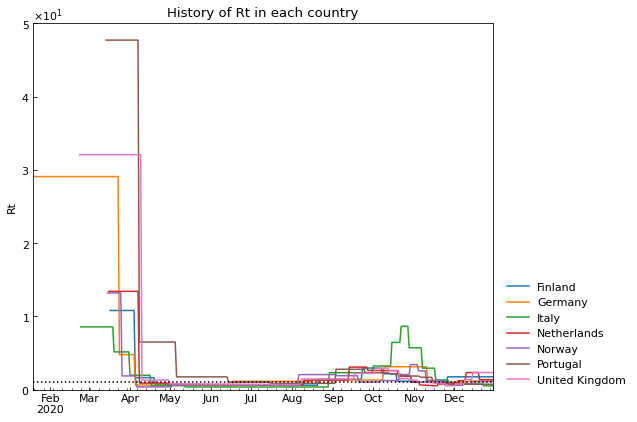

Country,Finland,Germany,Italy,Netherlands,Norway,Portugal,United Kingdom
Date,,,,,,,
2020-12-26,1.76,1.19,0.53,1.37,1.13,0.75,2.35
2020-12-27,1.76,1.19,0.53,1.37,1.13,0.75,2.35
2020-12-28,1.76,1.19,0.53,1.37,1.13,0.75,2.35
2020-12-29,1.76,1.19,0.53,1.37,1.13,0.75,2.35
2020-12-30,1.76,1.19,0.53,1.37,1.13,0.75,2.35


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

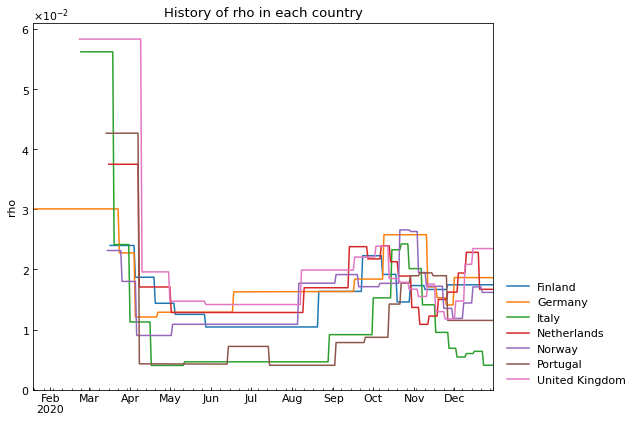

Country,Finland,Germany,Italy,Netherlands,Norway,Portugal,United Kingdom
Date,,,,,,,
2020-12-26,0.017442,0.018627,0.004067,0.016694,0.016175,0.011522,0.023466
2020-12-27,0.017442,0.018627,0.004067,0.016694,0.016175,0.011522,0.023466
2020-12-28,0.017442,0.018627,0.004067,0.016694,0.016175,0.011522,0.023466
2020-12-29,0.017442,0.018627,0.004067,0.016694,0.016175,0.011522,0.023466
2020-12-30,0.017442,0.018627,0.004067,0.016694,0.016175,0.011522,0.023466


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

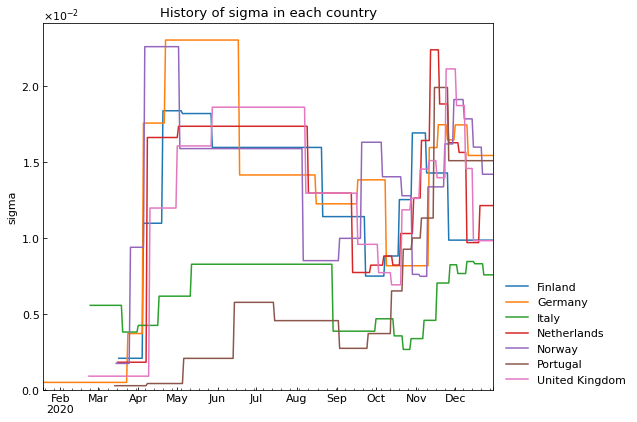

Country,Finland,Germany,Italy,Netherlands,Norway,Portugal,United Kingdom
Date,,,,,,,
2020-12-26,0.009842,0.015413,0.007558,0.012115,0.014178,0.01507,0.009805
2020-12-27,0.009842,0.015413,0.007558,0.012115,0.014178,0.01507,0.009805
2020-12-28,0.009842,0.015413,0.007558,0.012115,0.014178,0.01507,0.009805
2020-12-29,0.009842,0.015413,0.007558,0.012115,0.014178,0.01507,0.009805
2020-12-30,0.009842,0.015413,0.007558,0.012115,0.014178,0.01507,0.009805


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

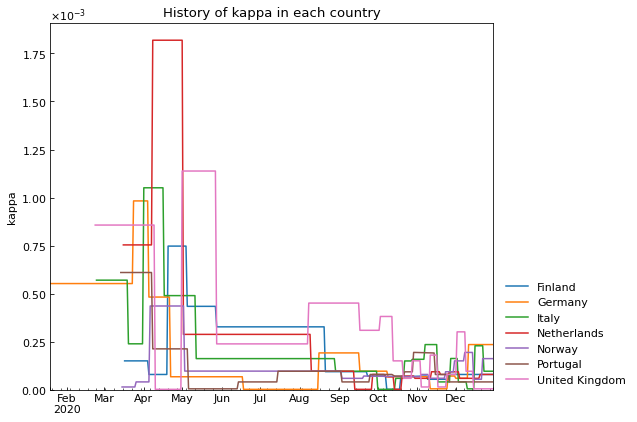

Country,Finland,Germany,Italy,Netherlands,Norway,Portugal,United Kingdom
Date,,,,,,,
2020-12-26,0.000079,0.000235,0.000096,0.000079,0.000162,0.000041,0.000005
2020-12-27,0.000079,0.000235,0.000096,0.000079,0.000162,0.000041,0.000005
2020-12-28,0.000079,0.000235,0.000096,0.000079,0.000162,0.000041,0.000005
2020-12-29,0.000079,0.000235,0.000096,0.000079,0.000162,0.000041,0.000005
2020-12-30,0.000079,0.000235,0.000096,0.000079,0.000162,0.000041,0.000005


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

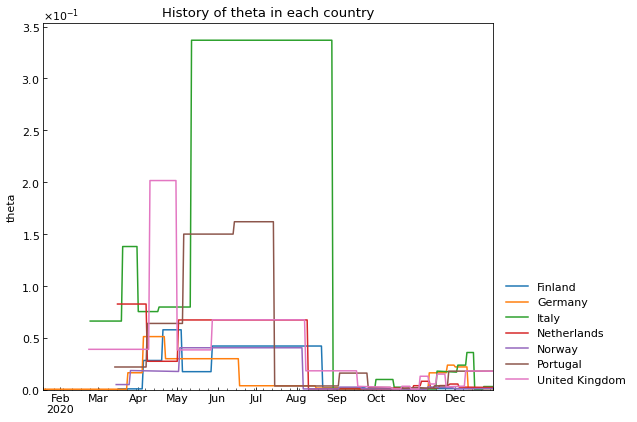

Country,Finland,Germany,Italy,Netherlands,Norway,Portugal,United Kingdom
Date,,,,,,,
2020-12-26,0.001132,0.001016,0.003041,0.002166,0.001116,0.017892,0.017827
2020-12-27,0.001132,0.001016,0.003041,0.002166,0.001116,0.017892,0.017827
2020-12-28,0.001132,0.001016,0.003041,0.002166,0.001116,0.017892,0.017827
2020-12-29,0.001132,0.001016,0.003041,0.002166,0.001116,0.017892,0.017827
2020-12-30,0.001132,0.001016,0.003041,0.002166,0.001116,0.017892,0.017827


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26817 entries, 0 to 26900
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 26817 non-null  datetime64[ns]
 1   Country                              26817 non-null  object        
 2   Rt                                   26817 non-null  float64       
 3   theta                                26817 non-null  float64       
 4   kappa                                26817 non-null  float64       
 5   rho                                  26817 non-null  float64       
 6   sigma                                26817 non-null  float64       
 7   School_closing                       26817 non-null  int64         
 8   Workplace_closing                    26817 non-null  int64         
 9   Cancel_events                        26817 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.160390,0.422531,0.753665,-0.580774,-0.266505,-0.414553,-0.635449,-0.575084,-0.311351,-0.236430,-0.401284,-0.492347,-0.436311,-0.533219,-0.283942,-0.466815
theta,-0.160390,1.000000,-0.067417,-0.308661,-0.094762,0.514808,0.028963,0.138493,-0.135097,0.527712,0.038733,0.297347,-0.100207,0.094025,-0.079387,0.160774,0.027682
kappa,0.422531,-0.067417,1.000000,0.424295,-0.182747,0.202237,0.045456,-0.246040,-0.254553,-0.082075,0.087246,-0.085652,-0.379392,-0.139420,-0.563781,-0.281749,0.019485
rho,0.753665,-0.308661,0.424295,1.000000,-0.347158,-0.302463,-0.267329,-0.500255,-0.364617,-0.471482,-0.222656,-0.360653,-0.406676,-0.173386,-0.395838,-0.174049,-0.250091
sigma,-0.580774,-0.094762,-0.182747,-0.347158,1.000000,0.118478,0.252293,0.350576,0.435430,-0.116246,-0.033841,0.073880,0.207120,0.253321,0.267175,0.096724,0.232604
School_closing,-0.266505,0.514808,0.202237,-0.302463,0.118478,1.000000,0.516104,0.491018,0.317667,0.422068,0.461073,0.533260,0.034343,0.285630,-0.060051,-0.011112,0.592280
Workplace_closing,-0.414553,0.028963,0.045456,-0.267329,0.252293,0.516104,1.000000,0.698506,0.694845,0.301682,0.706690,0.529183,0.198514,0.440229,0.217954,-0.102914,0.759908
Cancel_events,-0.635449,0.138493,-0.246040,-0.500255,0.350576,0.491018,0.698506,1.000000,0.686668,0.375610,0.516887,0.568791,0.399243,0.554826,0.457023,0.089758,0.706929
Gatherings_restrictions,-0.575084,-0.135097,-0.254553,-0.364617,0.435430,0.317667,0.694845,0.686668,1.000000,0.113898,0.488831,0.461754,0.286648,0.430006,0.460969,0.018396,0.713466
Transport_closing,-0.311351,0.527712,-0.082075,-0.471482,-0.116246,0.422068,0.301682,0.375610,0.113898,1.000000,0.297457,0.603727,-0.009148,0.211442,-0.020269,0.132417,0.268320


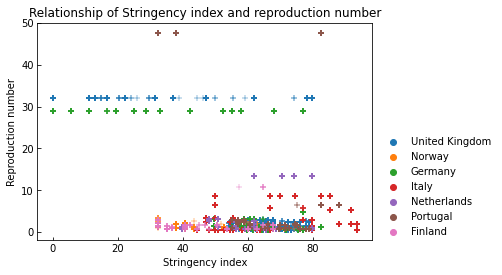

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()